# Анализ продаж

### Описание задачи

Необходимо проанализировать продажи компьютерных игр и выявить закономерности, определяющие успешность продукта. Для этого имеются данные о продажах, оценках пользователей и экспертов, жанрах и платформах.

### План работы

1. Загрузить подготовить данные
    1. Загрузить данные
    1. Выполнить обзор данных
    1. Выполнить предобработку данных
2. Выполнение анализа данных
3. Выявление предпочтений пользователей в каждом регионе
4. Проверка предположений
5. Вывод.

### Описание данных

* `Name` - название игры
* `Platform` - игровая платформа
* `Year_of_Release` - год выпуска игры
* `Genre` - жанр игры
* `NA_sales` - продажи в Северной Америке (количество проданных копий в миллионах)
* `EU_sales` - продажи в Европе (количество проданных копий в миллионах)
* `JP_sales` - продажи в Японии (количество проданных копий в миллионах)
* `Other_sales` - продажи в других странах (количество проданных копий в миллионах)
* `Critic_Score` - оценка от критиков (максимальная оценка 100)
* `User_Score` - оценка от пользователей (максимальная оценка 10)
* `Rating` - рейтинг от организации ESRB (англ. Entertainment Software Rating Board), которая определяет рейтинг компьютерных игр и присваивает им возрастную категорию.

## Обзор данных

### Чтение файлов с данными

Импортируем библиотеку pandas и другие необходимые библиотеки и прочитаем таблицу

In [467]:
#Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [468]:
#Чтение таблицы
data_games = pd.read_csv('C:/Users/datasets/game_sales.csv')

### Оценка содержимого и размера прочитанной таблицы

Далее выполним оценку содержимого и размера прочитанной таблицы

In [469]:
#Просмотр таблицы
data_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [470]:
#Просмотр сводной информации о таблице
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Вывод: в названиях столбцов отсутствует единый регистр - каждое название начинается с прописной буквы. В некоторых случаях второе по смыслу слово в названии также начинается с прописной буквы.

### Поиск пропусков данных в таблице

Далее выполним поиск пропусков в таблице

In [471]:
#Поиск и определение количества пропусков в таблице по столбцам
data_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Вывод: в таблице присутствуют пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Количество пропусков в каждом столбце указано выше. В названиях столбцов отсутствует единый регистр. Необходимо заполнение пропусков и приведение названий столбцов к единому регистру.

### Поиск строк-дубликатов в таблице

Далее выполним поиск строк-дубликатов в таблице

In [472]:
#Поиск и определение количества строк-дубликатов в таблице
data_games.duplicated().sum()

0

Вывод: строки-дубликаты в таблице отсутствуют.

### Вывод

Названия столбцов таблицы не имеют единого регистра. В таблице присутствуют пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Строки-дубликаты в таблице отсутствуют.

## Подготовка данных

### Замена названий столбцов

Заменим названия столбцов приведя их к нижнему регистру

In [473]:
#Исходные названия столбцов
data_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [474]:
#Замена названий столбцов приведением их к нижнему регистру
data_games.columns = [i.lower() for i in data_games.columns]

In [475]:
#Новые названия столбцов
data_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [476]:
#Приведение к единому регистру данные в столбцах name, platform, genre, rating
for column in data_games[['name','platform','genre','rating']]:
    data_games[column] = data_games[column].str.lower()

### Преобразование данных в нужные типы

In [477]:
#Просмотр сводной информации о таблице
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Требуется привести данные к нужным типам в следующих столбцах:

year_of_release - необходимо привести данные к типу Int64

user_score - необходимо привести данные к типу float64

In [478]:
#Приведение данных столбца year_of_release к целочисленному типу
data_games['year_of_release'] = data_games['year_of_release'].astype('Int64')

In [479]:
#Просмотр измененной в результате предыдущей операции таблицы
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Cтолбец user_score содержит вместе с числовыми данными данные строкового типа со значением 'tbd', которые необходимо заменить на NaN, имеющие вещественный тип. Это можно сделать при приведении типа данных следующим способом

In [480]:
#Перевод данных столбца в вещественный тип с заменой некорректных значений, включая 'tbd', на NaN
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce')

In [481]:
#Проверка результата последней операции.
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Столбец user_score теперь имеет тип float64

### Поиск и устранение ошибок в данных

In [482]:
#Проверка таблицы на пропуски
data_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Заметим, что количество пропусков в столбце user_score стало больше. Это произошло в результате замены значений 'tbd' на пропуски NaN.

Заполнение медианным значением года выпуска игры в большинстве случаев даст приблизительное значение, а это в случае года выпуска нежелательно. Заполнить медианным значением год выпуска игры можно только если есть необходимость, если ее нет, то лучше оставить пропуски NaN.

In [483]:
#Просмотр двух строк с пропусками в названии игры
data_games[data_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Заполнение двух пропусков названия игры не представляется возможным - отсутствуют какие-либо данные, позволяющие сделать вывод или предположить о том, что это были за игры.

Два пропущенных значения жанра относятся к этим двум неизвестным играм. Для того, чтобы предположить о том, что это был за жанр тоже не хватает данных. Заполнить два пропуска в столбце жанр тоже не получится.

In [484]:
data_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

В столбцах critic_score и user_score остались пропуски

В случае пропуска в столбце rating речь идет о категориальной переменной принимающей следующие значения

In [485]:
#Перечисление уникальных значений в столбце rating
data_games['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

Чтобы понять как заполнить пропуски в данном столбце проверим нет ли для одной и той же игры на разных платформах заполненных значений rating. 

In [486]:
#Строки с пропусками в столбце rating
data_games[data_games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [487]:
#Строки с одной из игр имеющей пропуски в столбце rating
data_games[data_games['name']=='tetris']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
157,tetris,nes,1988,puzzle,2.97,0.69,1.81,0.11,NaN,NaN,NaN


Подобным образом, проверяя вручную, можно убедиться, что в случае нескольких платформ все значения rating не заполнены.  По крайней мере, можно сказать, что готовых данных для заполнения всех пропусков в столбце rating нет. Вычислить медианное значение в случае категориальной переменной не получится. Заполнить пропуски наиболее часто встречающимся значением будет ошибочно - это приведет к ошибочным значениям возрастной категории для большинства игр, а это, в отличии от оценок пользователей и критиков, критично. Поэтому пропуски лучше оставить.

Чтобы не потерять большое количество данных, которое может оказаться полезным при выявлении предпочтений пользователей в каждом регионе, заполним пропуски значением 'unknown'.

In [488]:
#Заполнение пропусков в столбце rating строковым значением-заглушкой `unknown`
data_games['rating'] = data_games['rating'].fillna('unknown')

In [489]:
#Повторная проверка таблицы на пропуски
data_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

Заполнили пропуски в столбце rating строковым значением-заглушкой и выполнили повторную проверку таблицы на пропуски. Пропуски в столбце rating отсутствуют.

В столбце rating имеются следующие уникальные значения рейтинга: 'e', 'unknown', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'. Разберем смысл каждого значения, кроме 'unknown':

'E' («Everyone») - Для всех. Для возрастной категории от 6 лет.

'M' («Mature») - Для взрослых. Для возрастной категории от 17 лет.

'T' («Teen») - Подросткам. Для возрастной категории от 13 лет.

'E10+' («Everyone 10 and older») - Для всех от 10 лет и старше.

'K-A' ("Kids to Adults")  - То же самое что и значение "E". Ранее использовалось "K-A", теперь "E".

'AO' («Adults Only 18+») - Только для взрослых. Для возрастной категории старше 18 лет.

'EC' («Early childhood») - Для детей младшего возраста. Для возрастной категории от 3 лет.

'RP' («Rating Pending») - Рейтинг ожидается. 

Вывод: маркировки "K-A" и "E" имеют один и тот же смысл.

Далее, поскольку маркировка "K-A" считается устаревшей, в столбце rating найдем и заменим значения 'k-a' на 'e'.

In [490]:
#Замена в столбце rating значений k-a на e
data_games['rating'] = data_games['rating'].replace('k-a','e')

In [491]:
#Повторное определение уникальных значений столбца rating
data_games['rating'].unique()

array(['e', 'unknown', 'm', 't', 'e10+', 'ao', 'ec', 'rp'], dtype=object)

Значения k-a в столбце rating теперь отсутствуют.

### Суммарные продажи во всех регионах

In [492]:
#Добавление нового столбца с общими продажами
data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']

In [493]:
#Просмотр таблицы после изменения
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Вывод

Было выполнено приведение к целочисленному типу столбца year_of_release. Были приведены к единому регистру названия всех столбцов и данные столбцов name, platform, genre, rating. Имелись пропуски в столбцах year_of_release, name, genre, critic_score, user_score, rating. Были частично заполнены пропуски в столбце year_of_release на значение указанные для других платформ той же самой игры и полностью заполнены пропуски в столбцах critic_score и user_score на медианные значения столбца. Строки-дубликаты отсутствуют.

## Выполнение анализа данных

### Количество выпускаемых игр в разные годы

In [494]:
#Количество игр в разные годы
data_games.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

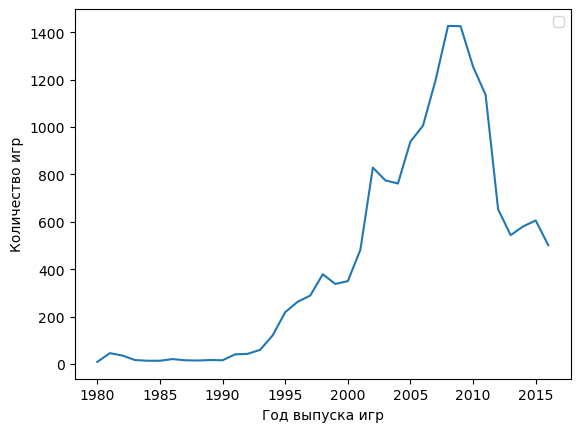

In [495]:
#График зависимости количества выпущенных игр от года выпуска
data_games.pivot_table(index='year_of_release', values='name', aggfunc='count').plot()
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска игр')
plt.legend('')

Вывод. Наибольшие значения наблюдаются в 2008-2009 годах. С 2012 года происходит снижение выпуска.

### Наиболее популярные платформы

In [496]:
#Сводная таблица общих продаж игр по платформам
data_games_top5 = data_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).head()

In [497]:
data_games_top5

,total_sales
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51
ds,806.12


Text(0, 0.5, 'Количество продаж')

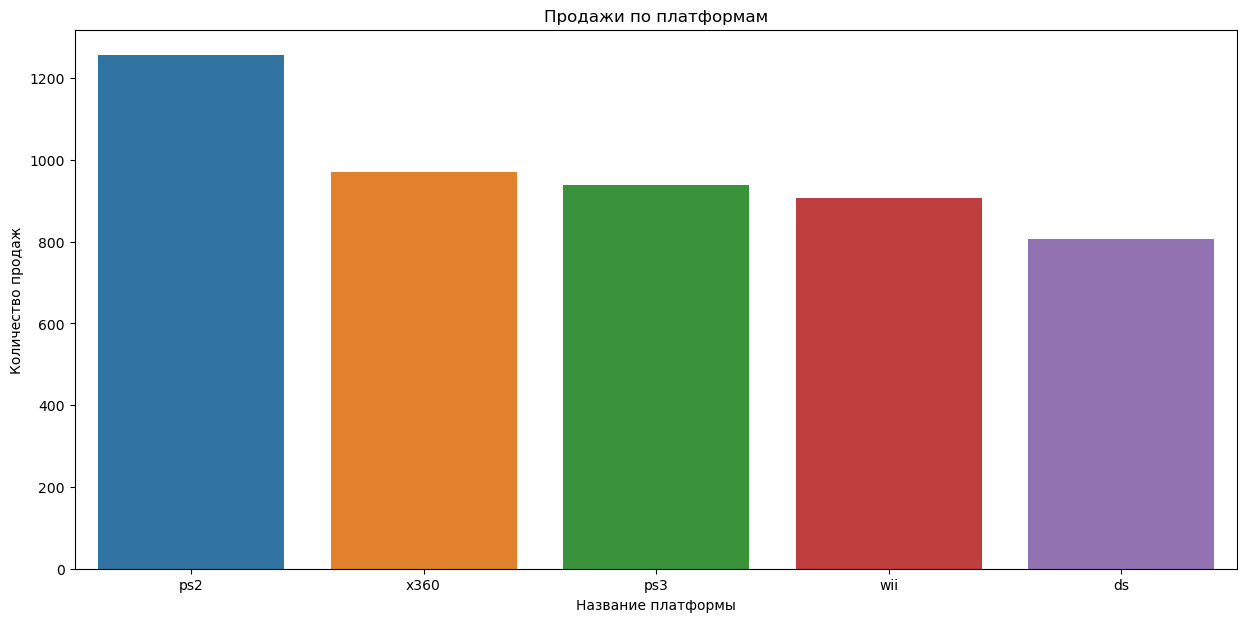

In [498]:
#График продаж по платформам для 5 наиболее популярных платформ.
plt.figure(figsize=(15,7))
sns.barplot(x=data_games_top5.index,y=data_games_top5['total_sales'])
plt.title("Продажи по платформам")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Вывод. Из графика видно, что самыми популярными платформами являются PS2, X360, PS3, WII, DS, PS

Далее будет построен линейный график с динамикой продаж топовых платформ по годам.

In [499]:
#Функция, которая возвращает сводную таблицу объема продаж по годам за исследуемый период, начиная с 2006 года
def pivot_table_for_platform_and_year(name, df):
    data_plat_and_year = df[(df['platform'] == name) & (df['year_of_release'] > 2005)]
    data_p_and_y_pivot_table = data_plat_and_year.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return data_p_and_y_pivot_table

Text(0.5, 0, 'Год выпуска')

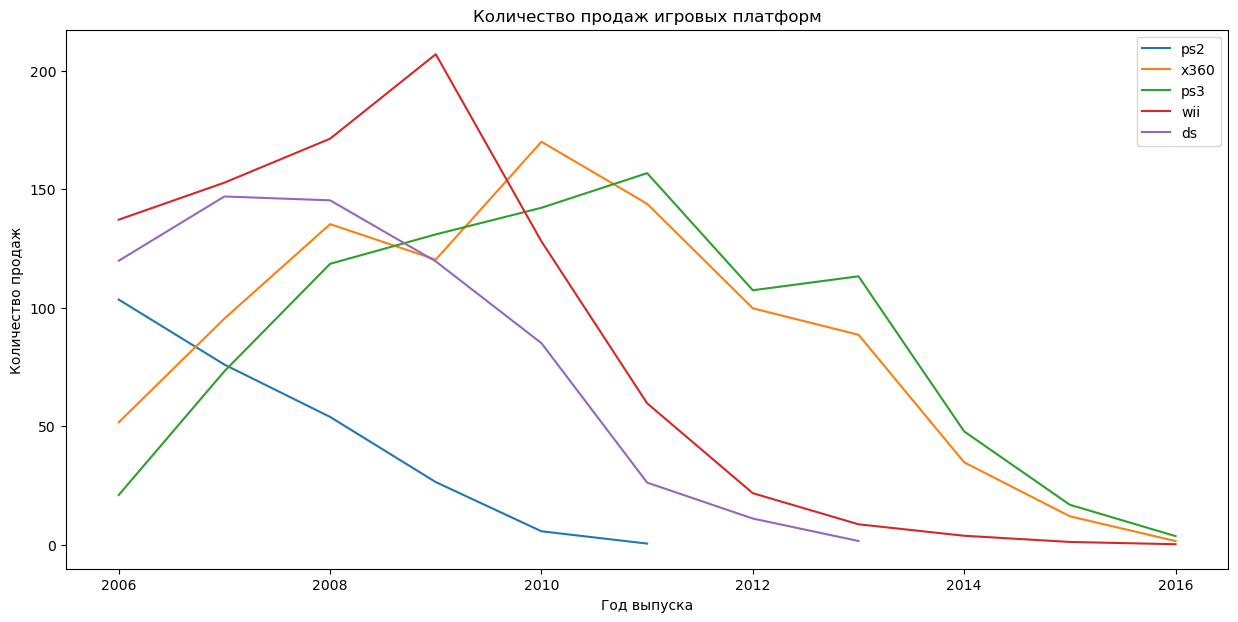

In [500]:
#Линейный график с динамикой продаж топовых платформ по годам
plt.figure(figsize=(15,7))
plt.title('Количество продаж игровых платформ')
plt.ylabel('Количество продаж')

for platform_name in data_games_top5.index:
    
    pivot_table_for_platform_and_year(platform_name, data_games)['total_sales'].plot(label=platform_name)
   
    plt.legend()
    
plt.xlabel('Год выпуска')

Почти все игровые платформы "продаются", то есть пользуются спросом и покупаются, на рынке около 10 лет. Наибольшими продажами в текущем году пользуются платформы ps2 и x360. В текущий период практически у всех платформ наблюдается падение продаж.

Средняя продолжительность жизни топ5 платформ:

In [501]:
# Средняя продолжительность жизни игровой платформы из топ5.
print('Период и время жизни каждой топ5 игровой платформы:')
data_platf_life_time = []
for platform_name in data_games_top5.index:
    
    print(platform_name, data_games[data_games['platform'] == platform_name]['year_of_release'].min(), '-',\
          data_games[data_games['platform'] == platform_name]['year_of_release'].max(),'гг.,',\
         data_games[data_games['platform'] == platform_name]['year_of_release'].max() - data_games[data_games['platform'] == platform_name]['year_of_release'].min() +1, 'лет.')
    data_platf_life_time.append(data_games[data_games['platform'] == platform_name]['year_of_release'].max() - data_games[data_games['platform'] == platform_name]['year_of_release'].min() +1)
print()
print('Среднее время жизни топ5 игровой платформы:')    
print (sum(data_platf_life_time)/len(data_platf_life_time))

Период и время жизни каждой топ5 игровой платформы:
ps2 2000 - 2011 гг., 12 лет.
x360 2005 - 2016 гг., 12 лет.
ps3 2006 - 2016 гг., 11 лет.
wii 2006 - 2016 гг., 11 лет.
ds 1985 - 2013 гг., 29 лет.

Среднее время жизни топ5 игровой платформы:
15.0


### Изменения продаж по платформам. Платформы лидирующие в настоящее время (актуальный период) по продажам, растущие или падающие.

В качестве исследуемого периода возьмем последние 10 лет. Текущим является 2016 год. Значит, исследовать будем период 2006-2016 гг.

Возьмём за актуальный период 3 года. То есть исследуем данные за период 2013-2016 гг.

Ниже представлены функция, которая возвращает сводную таблицу объема продаж по годам за исследуемый период и формирование графиков с помощью этой функции за исследуемый период. Учитывается, что ряд сводных таблиц для отрисовки очередного графика будет получаться пустым за исследуемый период, и пытаться рисовать график по ним не стоит.

In [502]:
#Функция, которая возвращает сводную таблицу объема продаж по годам за исследуемый период, начиная с 2013 года
def pivot_table_for_platform_and_year(name, df):
    data_plat_and_year = df[(df['platform'] == name) & (df['year_of_release'] > 2012)]
    data_p_and_y_pivot_table = data_plat_and_year.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return data_p_and_y_pivot_table

Text(0.5, 0, 'Год выпуска')

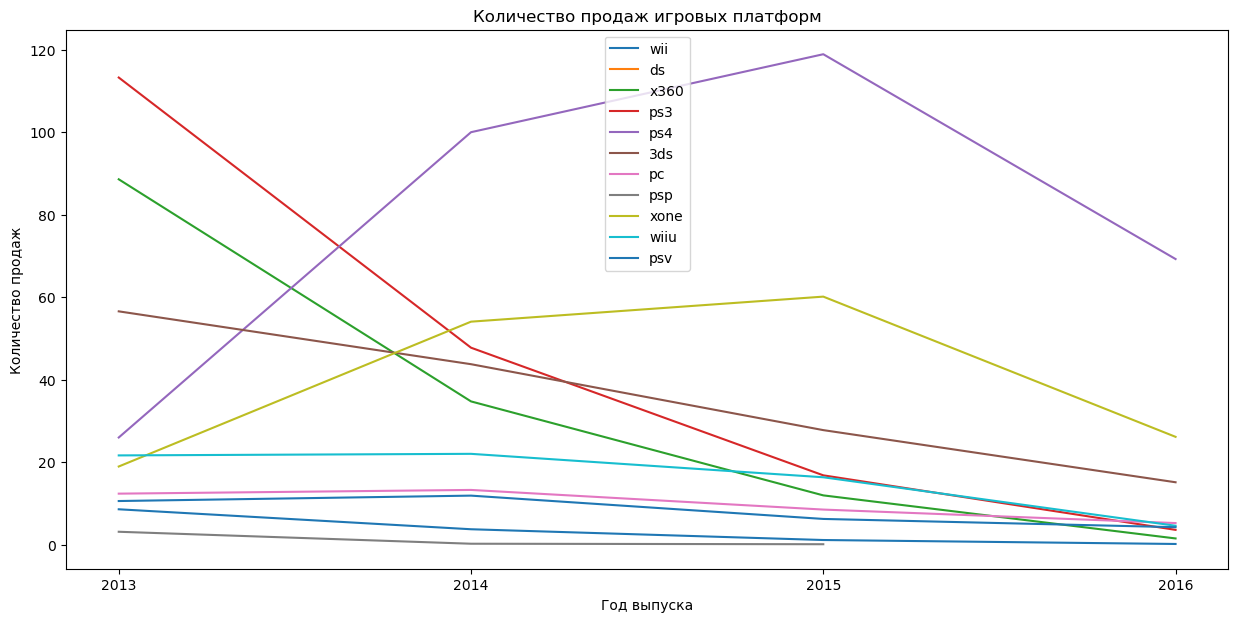

In [503]:
#Линейный график с динамикой продаж топовых платформ по годам для исследуемого периода
plt.figure(figsize=(15,7))
plt.title('Количество продаж игровых платформ')
plt.ylabel('Количество продаж')
 
platform_names = data_games['platform'].unique()
for platform_name in platform_names:
    data = pivot_table_for_platform_and_year(platform_name, data_games)
    if data.empty == False:
        
        data['total_sales'].plot(label=platform_name, xticks = [2013, 2014, 2015, 2016])
        plt.legend()
   
          
plt.xlabel('Год выпуска')

Ни одна платформа в актуальный период не показывает устойчивого роста продаж. Только две платформы показали рост и затем снова падение, которое может и не оказаться таковым поскольку 2016 год текущий и еще не показал окончательных результатов продаж. Поэтому, отнесем их к наиболее перспективным. Это платформы PS4 и XONE.

### График "ящик с усами" по глобальным продажам игр с разбивкой по платформам

Перспективными платформами в актуальный период являются PS4 и XONE.

In [504]:
#Список самых популярных платформ
data_games_top_list = ['ps4','xone']

In [505]:
#Строки из основных данных с 2 самыми перспективными платформами и
#"Отсечём" лишние выбросы для более удачного построения ящика с усами
data_games_top = data_games[data_games['platform'].isin(data_games_top_list)]


(0.0, 2.0)

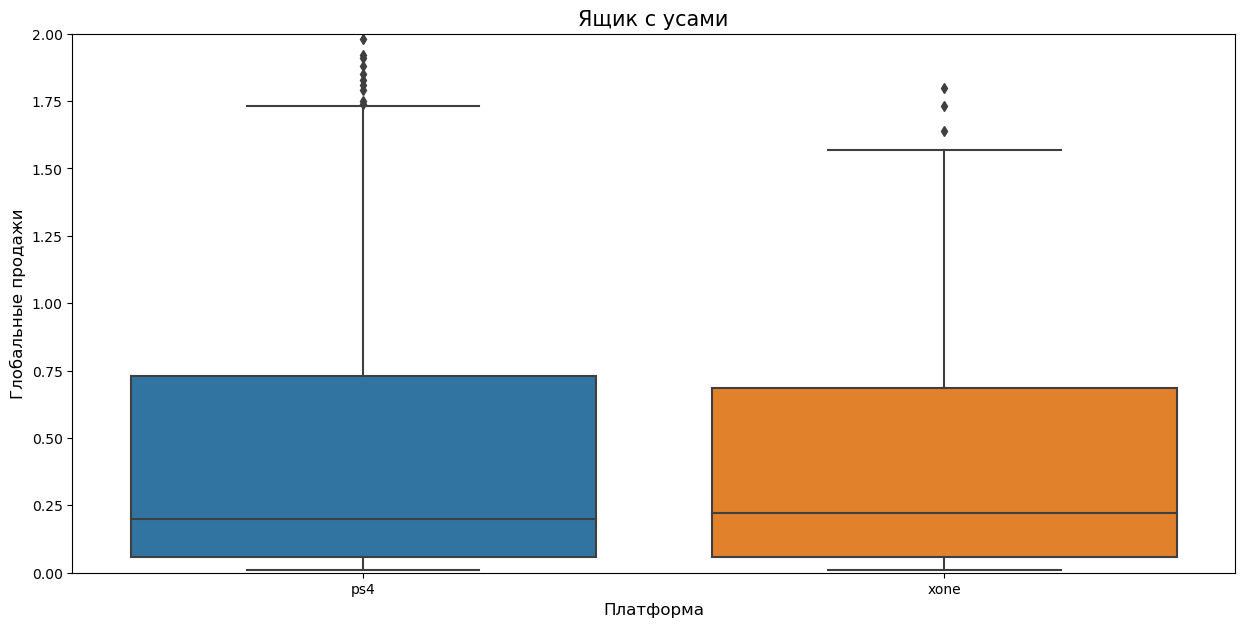

In [506]:
#Построение ящика с усами для 2 самых перспективных платформ
plt.figure(figsize=(15,7))
sns.boxplot(data=data_games_top, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(0,2)

Построен "ящик с усами" для двух перспективных в актуальный период платформ.

Далее построены графики для 5 наиболее популярных платформ.

In [507]:
#Список самых популярных платформ
data_games_top5_list = list(data_games_top5.index)

In [508]:
#Строки из основных данных с 5-ю самыми популярными платформами и
#"Отсечём" лишние выбросы для более удачного построения ящика с усами
data_games_top5 = data_games[data_games['platform'].isin(data_games_top5_list)]
data_games_top5 = data_games_top5[data_games_top5['total_sales']<1.4]

Text(0, 0.5, 'Глобальные продажи')

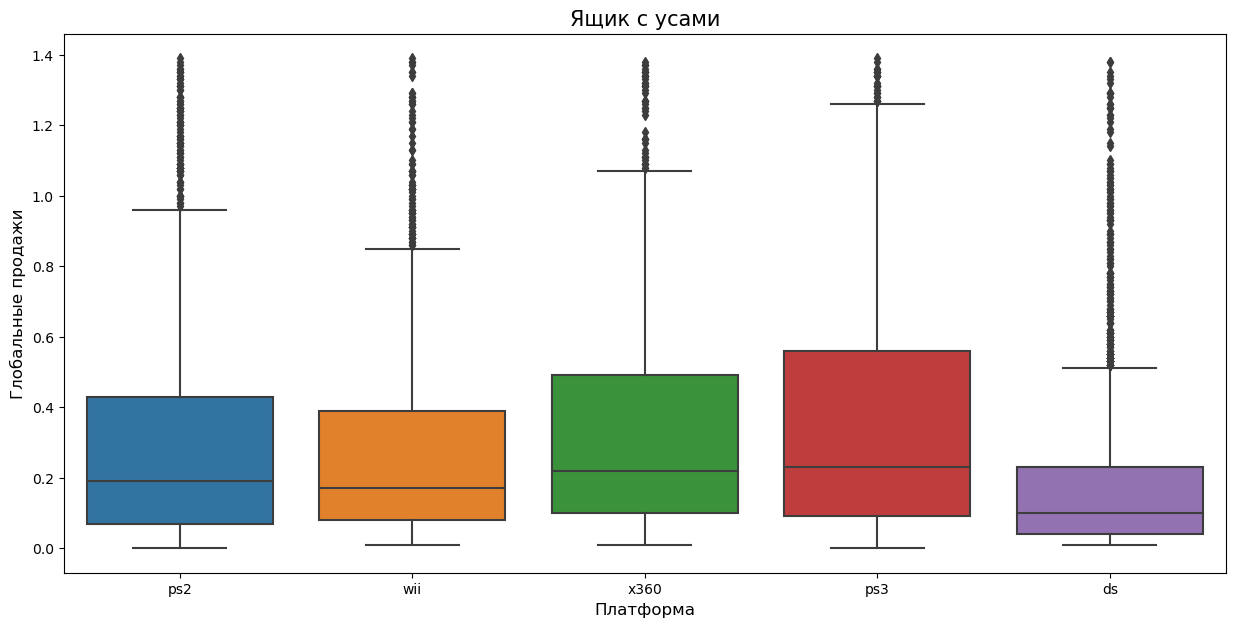

In [509]:
#Построение ящика с усами для 5 самых популярных платформ
plt.figure(figsize=(15,7))
sns.boxplot(data=data_games_top5, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

Вывод.

Больше всего продаж у ps3, затем у x360, ps2, wii, ds

### Зависимость продаж от оценок пользователей и критиков

In [50]:
#Срез данных по платформе ps2
play_station2 = data_games[data_games['platform']=='ps2']

In [51]:
#Корреляция между объемом продаж о оценками пользователей
play_station2['total_sales'].corr(play_station2['user_score'])

0.17286551112058213

Text(0.5, 1.0, 'PS2')

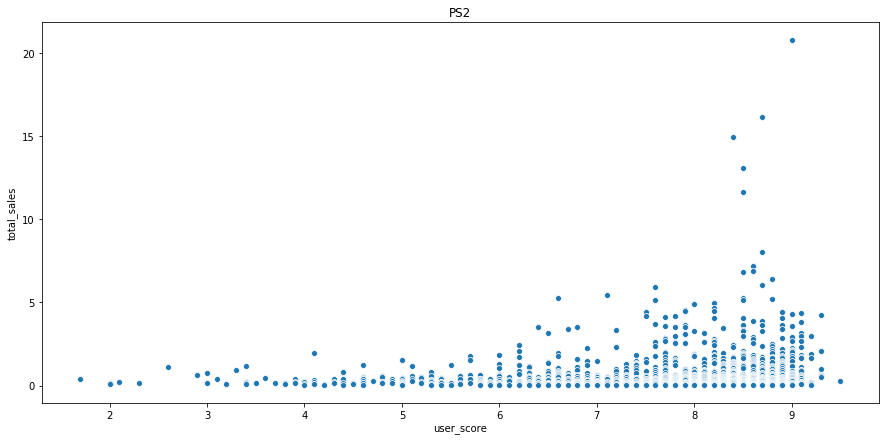

In [52]:
#Диаграмма рассеяния по оценкам пользователей
plt.figure(figsize=(15,7))
sns.scatterplot(data=play_station2, x='user_score', y='total_sales')
plt.title('PS2')

Text(0.5, 1.0, 'PS2')

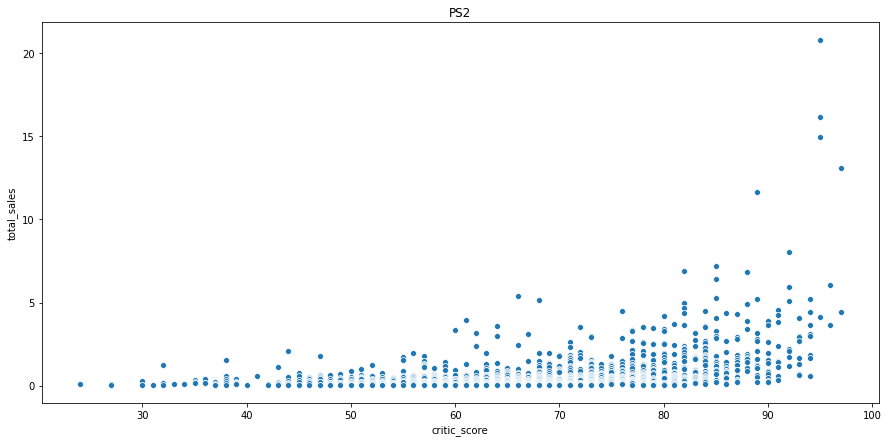

In [53]:
#Диаграмма рассеяния по оценкам критиков
plt.figure(figsize=(15,7))
sns.scatterplot(data=play_station2, x='critic_score', y='total_sales')
plt.title('PS2')

In [54]:
#Корреляция между оценкой критиков и продажами
play_station2['total_sales'].corr(play_station2['critic_score'])

0.3954345494545487

In [55]:
#Функция, строящая графики рассеяния и считающая корреляции
def other_platform(platform_name):
    data_platform = data_games[data_games['platform']==platform_name]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=data_platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=data_platform, ax=ax[1])
    fig.suptitle(platform_name, fontsize=18)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    user_cor = data_platform['total_sales'].corr(data_platform['user_score'])
    critic_cor = data_platform['total_sales'].corr(data_platform['critic_score'])
    
    if 0.2 >= critic_cor >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', platform_name, ': Слабая', critic_cor)
    if 0.5 >= critic_cor > 0.2:
        print('Корреляция между отзывами критиков и игровой платформой ', platform_name, ': Средняя', critic_cor)
    if 0.7 >= critic_cor > 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', platform_name, ': Высокая', critic_cor)
    if 0.9 >= critic_cor > 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', platform_name, ': Очень высокая', critic_cor)
    if 1 >= critic_cor > 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', platform_name, ': Сильная', critic_cor)
    
    if 0.2 >= user_cor >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', platform_name, ': Слабая', user_cor)
    if 0.5 >= user_cor > 0.2:
        print('Корреляция между отзывами пользователей и продажами ', platform_name, ': Средняя', user_cor)
    if 0.7 >= user_cor > 0.5:
        print('Корреляция между отзывами пользователей и продажами ', platform_name, ': Высокая', user_cor)
    if 0.9 >= user_cor > 0.7:
        print('Корреляция между отзывами пользователей и продажами ', platform_name, ': Очень высокая', user_cor)
    if 1 >= user_cor > 0.9:
        print('Корреляция между отзывами пользователей и продажами ', platform_name, ': Сильная', user_cor)
    print('\n')

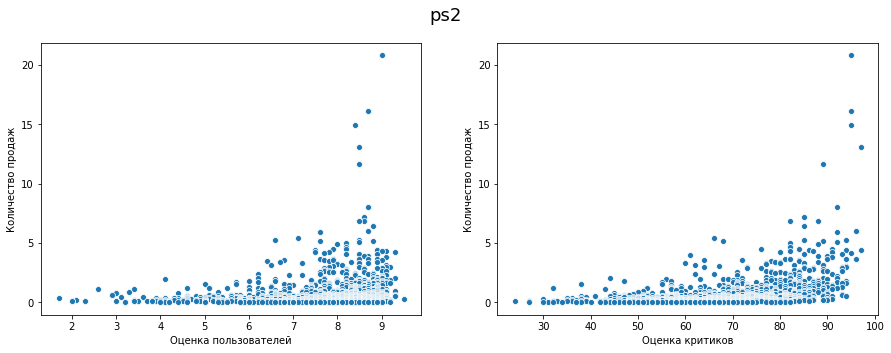

Корреляция между отзывами критиков и игровой платформой  ps2 : Средняя 0.3954345494545487
Корреляция между отзывами пользователей и продажами  ps2 : Слабая 0.17286551112058213




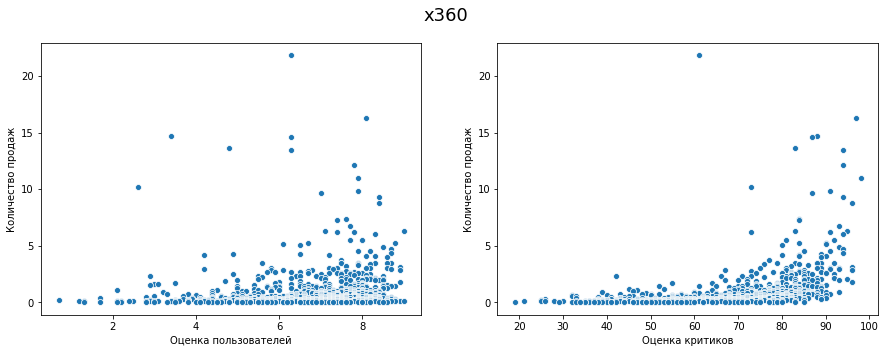

Корреляция между отзывами критиков и игровой платформой  x360 : Средняя 0.3937358653072588
Корреляция между отзывами пользователей и продажами  x360 : Слабая 0.11445882978454186




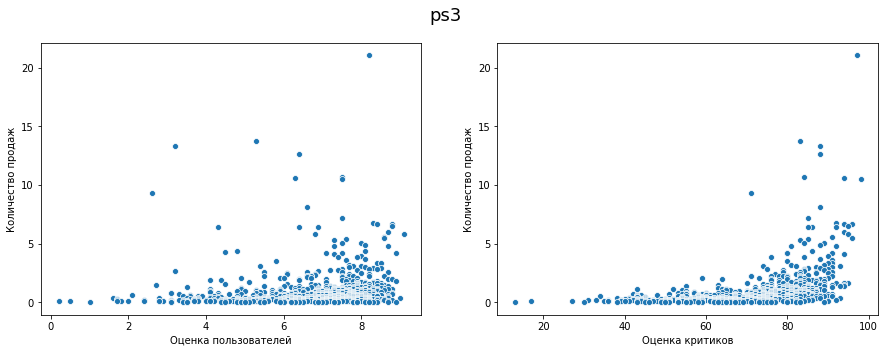

Корреляция между отзывами критиков и игровой платформой  ps3 : Средняя 0.43243156856420606
Корреляция между отзывами пользователей и продажами  ps3 : Слабая 0.12669133936341712




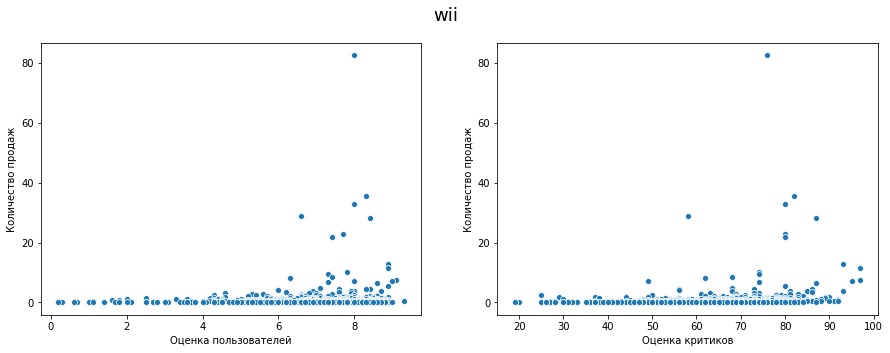

Корреляция между отзывами критиков и игровой платформой  wii : Слабая 0.17755988806089948
Корреляция между отзывами пользователей и продажами  wii : Слабая 0.11241436067003167




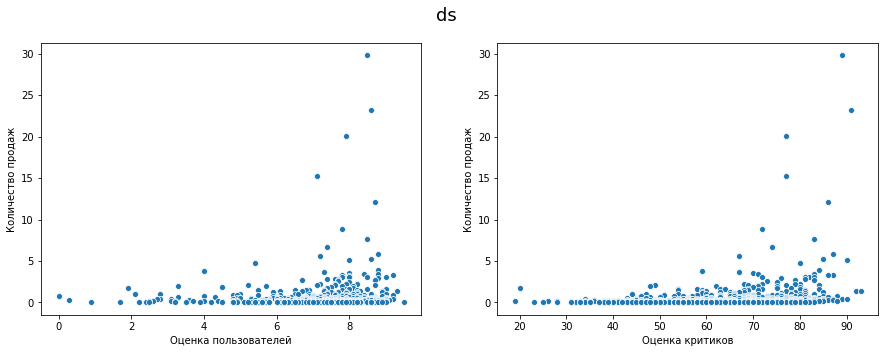

Корреляция между отзывами критиков и игровой платформой  ds : Средняя 0.23637945738859747
Корреляция между отзывами пользователей и продажами  ds : Слабая 0.1304355011164249




In [56]:
#Вывод диаграмм рассеяния и значений корреляции
for platform_value in data_games_top5_list:
    other_platform(platform_value)

У всех платформ наблюдается прямая зависимость между оценками пользователей и критиков и продажами. Однако, оценки критиков на продажи влияют сильнее.

### Распределение игр по жанрам

In [510]:
#Сводная таблица продаж по жанрам
genre_dis = data_games.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

In [511]:
genre_dis

,total_sales
genre,
action,1744.17
sports,1331.27
shooter,1052.45
role-playing,934.56
platform,827.77
misc,802.51
racing,728.67
fighting,447.53
simulation,389.97


Text(0, 0.5, 'Продажи игр')

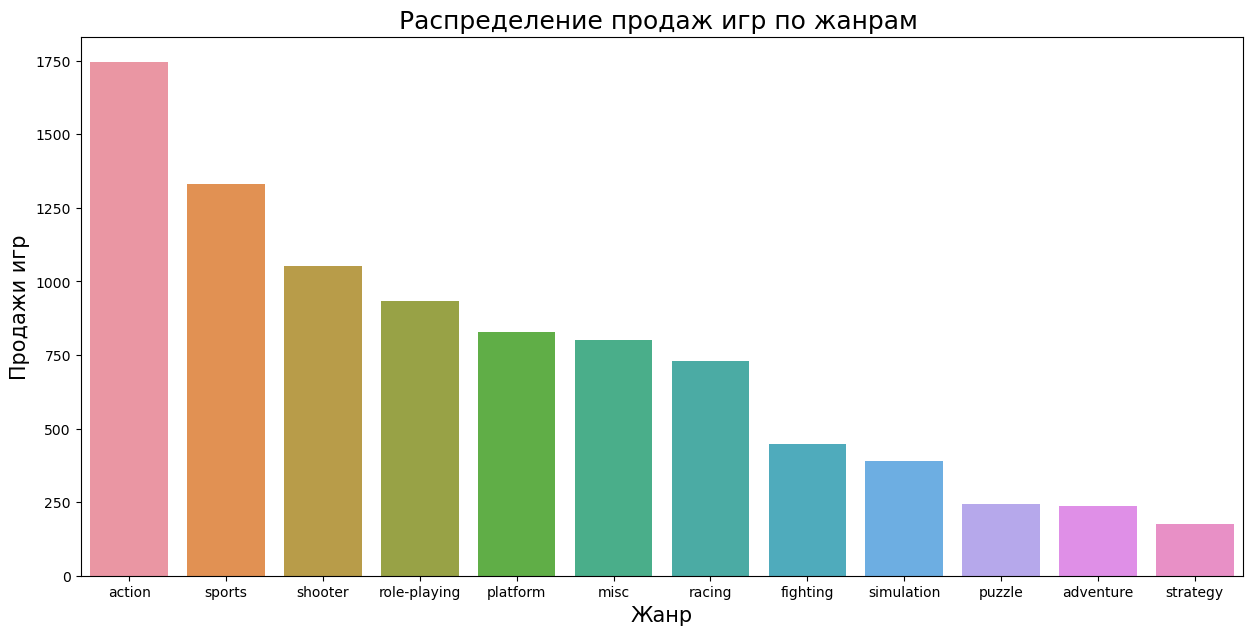

In [512]:
#Построение графика распределения продаж по жанрам
plt.figure(figsize=(15,7))
plt.title('Распределение продаж игр по жанрам ',fontsize=18)
sns.barplot(data=genre_dis, x=genre_dis.index, y='total_sales')
plt.xlabel('Жанр',fontsize=15)
plt.ylabel('Продажи игр',fontsize=15)

Вывод. Лучше всего продаются игры жанров action и sports. На третьем месте по продажам игры жанра shooter.

### Вывод

Больше всего игры выпускались в 2008-2009 годах. С 2012 года происходит снижение выпуска.
Самыми популярными игровыми платформами являются PS2, X360, PS3, WII, DS, PS.
Период эффективных продаж игровой платформы составляет около 10 лет.
Самой продаваемой за весь период является платформа ps2, а самой продаваемой в настоящий год - платформа ps3. Также в список самых продаваемых входят платформы xbox360, wii и ds.
У всех популярных платформ наблюдается прямая зависимость между оценками критиков и пользователей и объмемом продаж. Стоит также заметить, что оценка критиков оказывает большее влияние, чем оценка пользователей.

## Выявление предпочтений пользователей в каждом регионе

In [513]:
#Функция для создания сводных таблиц для топ-5 платформ, жанров и возрастных рейтингов и формирования по ним графиков
def top_platform(region, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):    
        ppivot = data_games.pivot_table(index=pivot, values=region, aggfunc='sum').sort_values(by=region, ascending=False).reset_index().head(5)
        print(ppivot)
        print('\n\n') 
        #sns.set_palette("Blues")
        sns.barplot(data=ppivot, x=pivot, y=region, ax=ax)
        
        fig.suptitle(title, fontsize=18)
    plt.show()
    sns.set()    
    
    ppivot = data_games.pivot_table(index='platform', values=region, aggfunc='sum').sort_values(by=region, ascending=False).reset_index().head(5)
    plt.title(region)
    plt.pie(ppivot[region],  labels = ppivot['platform'], autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
    
    
    
        
        

  platform  na_sales
0     x360    602.47
1      ps2    583.84
2      wii    496.90
3      ps3    393.49
4       ds    382.40



      genre  na_sales
0    action    879.01
1    sports    684.43
2   shooter    592.24
3  platform    445.50
4      misc    407.27



    rating  na_sales
0        e   1295.55
1  unknown   1242.46
2        t    759.75
3        m    748.48
4     e10+    353.32





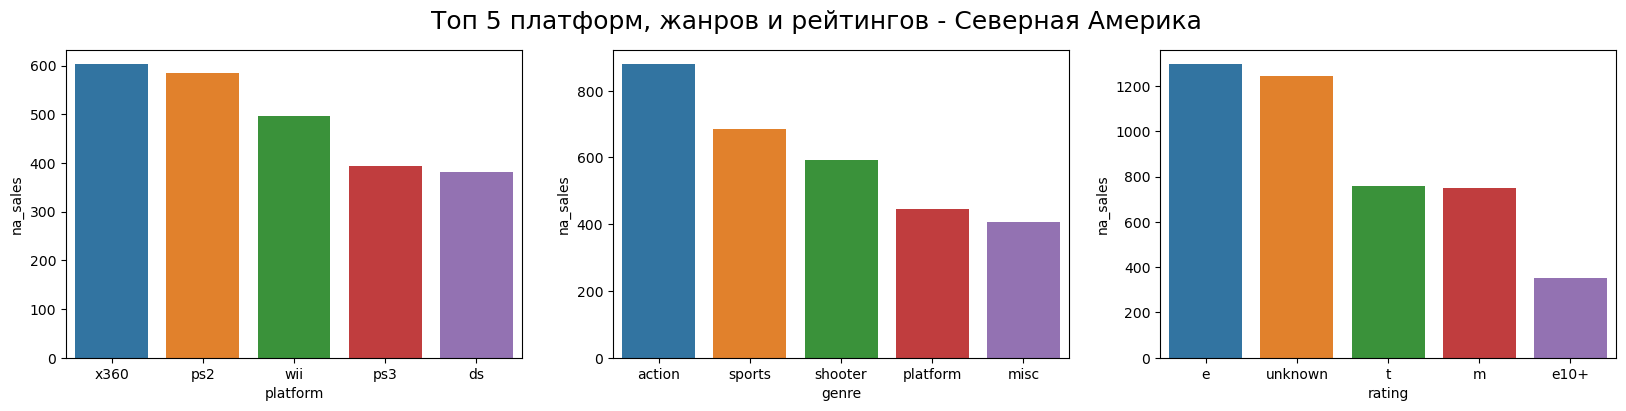

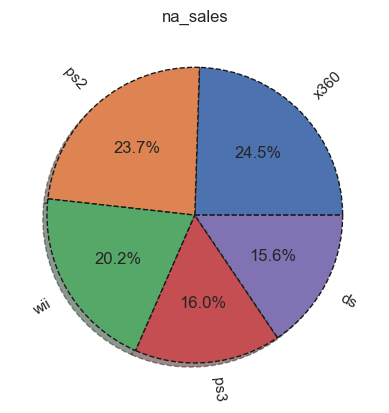

In [514]:
#Обращение к функции для получения данных по региону Северная Америка
top_platform('na_sales','Топ 5 платформ, жанров и рейтингов - Северная Америка')

Вывод. Самыми популярными игровыми платформами в Америке являются x360, ps2, wii, ps3, ds в порядке убывания.
Самыми популярными жанрами являются action, sports, shooter.
Самые продаваемые возрастные рейтинги  - 'E','T','M','E10+' в порядке убывания.

  platform  eu_sales
0      ps2    339.29
1      ps3    330.29
2     x360    270.76
3      wii    262.21
4       ps    213.61



     genre  eu_sales
0   action    519.13
1   sports    376.79
2  shooter    317.34
3   racing    236.51
4     misc    212.74



    rating  eu_sales
0        e    710.52
1  unknown    613.83
2        m    483.97
3        t    427.03
4     e10+    188.52





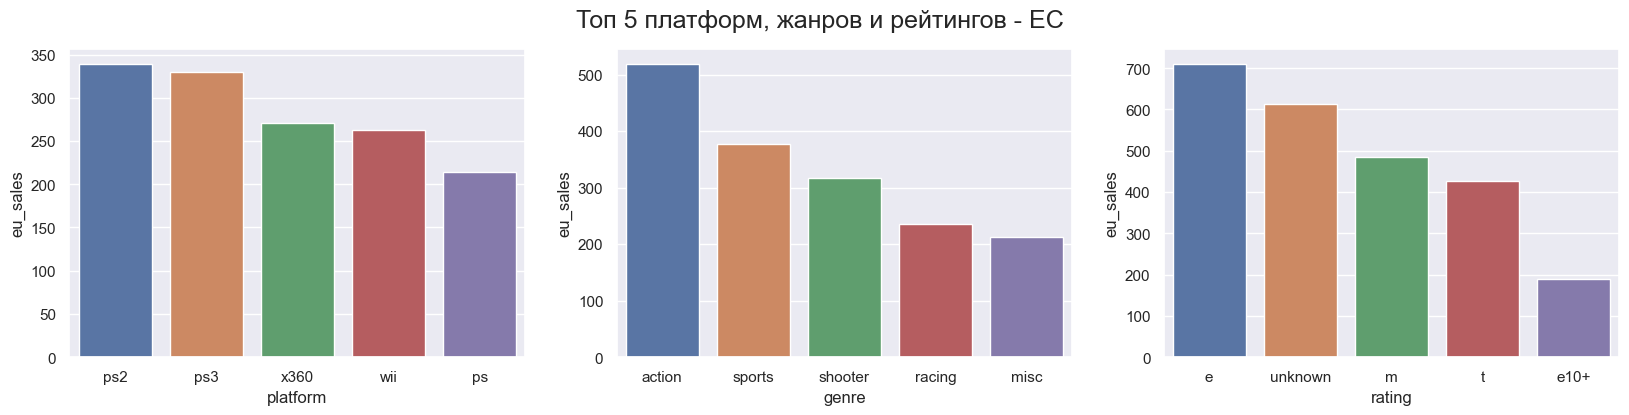

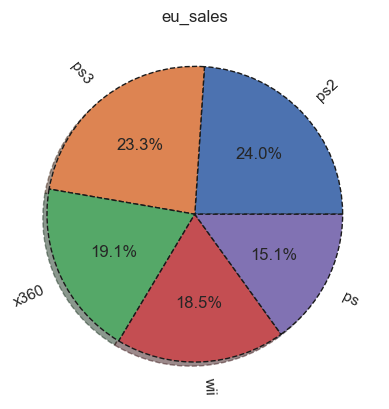

In [515]:
#Обращение к функции для получения данных по региону Европа
top_platform('eu_sales','Топ 5 платформ, жанров и рейтингов - ЕС')

В Европе за все время существования игр самыми продаваемыми были платформы ps2, ps3, x360, wii, ps.
Самые популярные жанры - это action, sports, shooter, racing, misc.
Больше всего продаж в возрастных рейтингах 'E','M','T','E10+'

  platform  jp_sales
0       ds    175.57
1       ps    139.82
2      ps2    139.20
3     snes    116.55
4      3ds    100.67



          genre  jp_sales
0  role-playing    355.41
1        action    161.43
2        sports    135.54
3      platform    130.83
4          misc    108.11



    rating  jp_sales
0  unknown    841.96
1        e    199.57
2        t    151.40
3        m     64.24
4     e10+     40.20





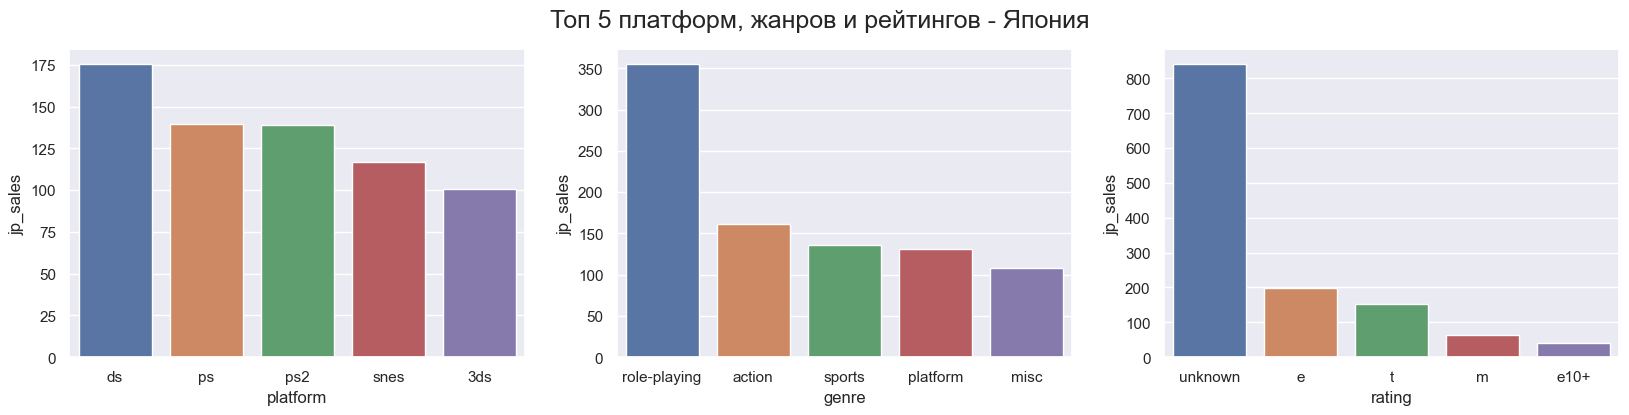

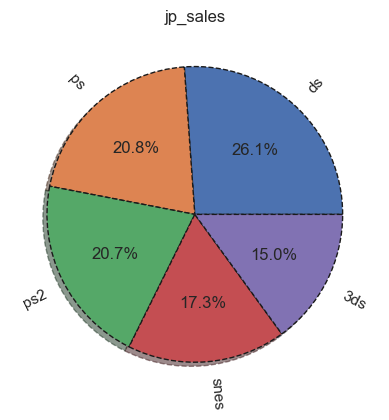

In [516]:
#Обращение к функции для получения данных по региону Япония
top_platform('jp_sales','Топ 5 платформ, жанров и рейтингов - Япония')

В Японии самыми популярными платформами являются ds, ps, ps2, snes, 3ds.
Самые продаваемые жанры role-playing, action, sports.
Больше всего продаж в возрастных категориях 'E','T','M','E10+'.

### Вывод

Самыми популярными игровыми платформами в Америке являются x360, ps2, wii, ps3, ds в порядке убывания.
Самыми популярными жанрами являются action, sports, shooter.
Самые продаваемые возрастные рейтинги  - 'E','T','M','E10+' в порядке убывания.

В Европе за все время существования игр самыми продаваемыми были платформы ps2, ps3, x360, wii, ps.
Самые популярные жанры - это action, sports, shooter, racing, misc.
Больше всего продаж в возрастных рейтингах 'E','M','T','E10+'

Предпочтения пользователей в Европе и Америке являются схожими.

В Японии самыми популярными платформами являются ds, ps, ps2, snes, 3ds.
Самые продаваемые жанры role-playing, action, sports.
Больше всего продаж в возрастных категориях 'E','T','M','E10+'.

## Проверка предположений

### Предположение о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC являются одинаковыми.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC являются разными.

Чтобы отсеять пропуски NaN добавим в срез дополнительное условие data_games['user_score'].isna() == False.

In [64]:
#Срез данных user_score по платформе xone за исследуемый период 2013-2016гг
data_xone = data_games[(data_games['platform']=='xone') & (data_games['year_of_release'] > 2012) & (data_games['user_score'].isna() == False)]['user_score']

In [65]:
#Проверка на пропуски
data_xone.isna().sum()

0

Чтобы отсеять пропуски NaN добавим в срез дополнительное условие data_games['user_score'].isna() == False

In [66]:
#Срез данных user_score по платформе pc за исследуемый период 2013-2016гг
data_pc = data_games[(data_games['platform']=='pc') & (data_games['year_of_release'] > 2012) & (data_games['user_score'].isna() == False)]['user_score']

In [67]:
#Проверка на пропуски
data_pc.isna().sum()

0

In [68]:
#Среднее совокупности данных для xone
data_xone.mean()

6.521428571428572

In [69]:
#Среднее совокупности данных для pc
data_pc.mean()

6.280379746835442

In [70]:
#Критический уровень статистической значимости
alpha = 0.05

In [71]:
#Применение метода ttest_ind на двух совокупностях
results = st.ttest_ind(data_xone, data_pc)

In [72]:
#Вывод p-value
print('p-значение:', results.pvalue)

p-значение: 0.15503167687396294


In [73]:
#Общее количество значений в совокупности data_xone вместе с пропусками
data_xone.shape

(182,)

In [74]:
#Количество пропусков nan в совокупности data_xone
data_xone.isna().sum()

0

Количество пропусков в совокупности data_xone составляет 26% от общего количества значений.

In [75]:
#Общее количество значений в совокупности data_pc
data_pc.shape

(158,)

In [76]:
#Количество пропусков nan в совокупности data_pc
data_pc.isna().sum()

0

Количество пропусков в совокупности data_pc составляет 17% от общего количества значений совокупности data_pc

In [77]:
#Результат проверки гипотезы
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Вывод. У нас не получилось отвергнуть нулевую гипотезу, а это значит, что средние двух совокупностей приблизительно, с определенной долей допустимой погрешности, равны. Сравнив вычисленные ранее значения средних двух совокупностей, можно сказать, что это верно.

### Предположение о том, что средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

Чтобы отсеять пропуски NaN добавим в срез дополнительное условие data_games['user_score'].isna() == False

In [78]:
#Срез данных user_score по жанру action за исследуемый период 2006-2016гг.
data_genre_action = data_games[(data_games['genre']=='action') & (data_games['year_of_release'] > 2012) & (data_games['user_score'].isna() == False)]['user_score']

Чтобы отсеять пропуски NaN добавим в срез дополнительное условие data_games['user_score'].isna() == False

In [79]:
#Срез данных user_score по жанру sports за исследуемый период 2006-2016гг.
data_genre_sports = data_games[(data_games['genre']=='sports') & (data_games['year_of_release'] > 2012) & (data_games['user_score'].isna() == False)]['user_score']

In [80]:
#Проверка на пропуски
data_genre_action.isna().sum()

0

In [81]:
#Проверка на пропуски
data_genre_sports.isna().sum()

0

In [82]:
#Среднее совокупности данных для жанра action
data_genre_action.mean()

6.8375

In [83]:
#Среднее совокупности данных для жанра sports
data_genre_sports.mean()

5.238124999999999

In [84]:
#Критический уровень статистической значимости
alpha = 0.05

In [85]:
#Применение метода ttest_ind на двух совокупностях
results = st.ttest_ind(data_genre_action, data_genre_sports)

In [86]:
#Вывод значения p-value
print('p-значение:', results.pvalue)

p-значение: 8.11729623919141e-28


In [87]:
#Результат проверки гипотезы
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Вывод. Отвергаем нулевую гипотезу. Это значит, что верна альтернативная гипотеза, то есть средние пользовательские рейтинги жанров Action и Sports разные, что также видно по их подсчитанным значениям. 

Вывод. Не получилось отвергнуть нулевую гипотезу, а это значит, что средние пользовательские рейтинги жанров Action и Sports должны быть одинаковые. Однако, стоит учесть, что p-value получилось равным nan и вывод может быть неверным и глядя на подсчитанные средние значения двух совокупностей можно сказать, что вывод неверен. 

### Вывод

Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, верна.
Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые, неверна, они разные.

## Общий вывод

Названия столбцов таблицы не имеют единого регистра. В таблице присутствуют пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Строки-дубликаты в таблице отсутствуют.

Было выполнено приведение к целочисленному типу столбца year_of_release. Были приведены к единому регистру названия всех столбцов и данные столбцов name, platform, genre, rating. Имелись пропуски в столбцах year_of_release, name, genre, critic_score, user_score, rating. Были частично заполнены пропуски в столбце year_of_release на значение указанные для других платформ той же самой игры и полностью заполнены пропуски в столбцах critic_score и user_score на медианные значения столбца. Строки-дубликаты отсутствуют.

Больше всего игры выпускались в 2008-2009 годах. С 2012 года происходит снижение выпуска. Самыми популярными игровыми платформами являются PS2, X360, PS3, WII, DS, PS. Период эффективных продаж игровой платформы составляет около 10 лет. Самой продаваемой за весь период является платформа ps2, а самой продаваемой в настоящий год - платформа ps3. Также в список самых продаваемых входят платформы xbox360, wii и ds. У всех популярных платформ наблюдается прямая зависимость между оценками критиков и пользователей и объмемом продаж. Стоит также заметить, что оценка критиков оказывает большее влияние, чем оценка пользователей.

Самыми популярными игровыми платформами в Америке являются x360, ps2, wii, ps3, ds в порядке убывания.
Самыми популярными жанрами являются action, sports, shooter.
Самые продаваемые возрастные рейтинги  - 'E','T','M','E10+' в порядке убывания.

В Европе за все время существования игр самыми продаваемыми были платформы ps2, ps3, x360, wii, ps.
Самые популярные жанры - это action, sports, shooter, racing, misc.
Больше всего продаж в возрастных рейтингах 'E','M','T','E10+'

В Японии самыми популярными платформами являются ds, ps, ps2, snes, 3ds.
Самые продаваемые жанры role-playing, action, sports.
Больше всего продаж в возрастных категориях 'E','T','M','E10+'.

Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, верна.
Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые, неверна, они разные.